In [2]:
import winsound
def beepEnd():
    d = 200
    freq = [3000,5000,3000,5000]
    for i in freq:
        winsound.Beep(i, d)

beepEnd()

In [3]:
import warnings
import joblib
import pandas as pd 
import numpy as np
import pickle 
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

from itertools import combinations
from itertools import permutations
warnings.filterwarnings('ignore')

def acceptanceProbability (bestMSE, newMSE, temp , K):
        # If the new solution is worse, calculate an acceptance probability
        return np.exp( K * (newMSE - bestMSE) / temp)
    
def calcMSE(combDesc, x_train, x_val, y_train, y_val, model):
    x_train_slice = x_train.iloc[:,combDesc]
    x_val_slice = x_val.iloc[:,combDesc]
    
    scaler = MinMaxScaler()
    scaler.fit(x_train_slice)
    scale_x_train = scaler.transform(x_train_slice)
    scale_x_val = scaler.transform(x_val_slice)
    
    model.fit(scale_x_train, y_train)
    y_pred = model.predict(scale_x_val)
    return mean_squared_error(y_val, y_pred)

corr_100 = joblib.load("pickle/corr_100.pkl")
dfTrain = joblib.load("pickle/train.pkl")
dfTest = joblib.load("pickle/test.pkl")

In [4]:
train = dfTrain.loc[:,corr_100]
descName = train.columns.values
train["pIC50"] = dfTrain.iloc[:, -1]
train

,nHBAcc_Lipinski,SM1_Dzi,GRAV-2,GRAV-3,GRAV-1,nHBa,WTPT-3,nHBAcc2,GRAV-5,GRAV-6,...,DELS2,ATS5s,ETA_Beta_s,MOMI-R,ATS3m,MOMI-Y,MWC3,MWC4,ATS6s,pIC50
25,6,1.195151,46.813167,12.989089,2191.472634,5.0,16.869328,5,68.509763,16.743066,...,31.300730,314.444444,15.25,7.479564,6973.821185,3955.998290,5.796058,6.722630,328.583333,5.638
9,8,1.645650,53.733578,14.239580,2887.297397,7.0,23.292124,7,80.854901,18.698391,...,36.549140,488.250000,21.50,9.708462,9799.642956,7358.145949,6.079933,6.985642,441.000000,7.086
20,8,1.645650,52.416497,14.005931,2747.489131,7.0,23.762466,7,77.594007,18.192210,...,32.073036,420.277778,19.75,9.047274,8579.893229,8403.026550,6.003887,6.914731,405.166667,7.921
18,9,1.818785,53.530352,14.203653,2865.498590,8.0,26.838266,8,79.556505,18.497674,...,35.707626,437.611111,20.75,9.341686,9104.534824,8249.699615,6.023448,6.930495,438.416667,7.921
67,8,1.610865,53.666070,14.227651,2880.047076,8.0,27.230892,7,80.596019,18.658457,...,30.533825,440.530864,20.50,9.252363,9478.181715,10161.911029,6.052089,6.974479,431.058642,7.046
19,8,1.645650,52.996035,14.108979,2808.579700,7.0,23.842885,7,80.187329,18.595328,...,32.555759,437.277778,20.25,8.671487,9089.152156,4779.368530,6.023448,6.930495,424.750000,7.921
21,5,1.022017,45.709411,12.784108,2089.350218,4.0,14.341144,4,66.536378,16.419986,...,24.646925,303.833333,14.50,7.141709,6559.271351,3336.850079,5.752573,6.678342,308.527778,6.076
23,5,1.022017,47.046373,13.032191,2213.361256,4.0,14.348235,4,68.984079,16.820255,...,25.625515,335.944444,15.50,7.806621,7225.141707,4751.945716,5.826000,6.748760,325.833333,6.194
90,10,2.044034,56.654924,14.751124,3209.780444,9.0,28.427382,9,84.518087,19.258972,...,44.865774,539.388889,22.50,10.324966,10228.679259,14008.899342,6.129050,7.032624,481.666667,8.155
62,8,1.558750,52.729939,14.061711,2780.446460,8.0,27.074920,7,78.653863,18.357493,...,32.193026,385.919753,19.25,8.751456,8864.719189,8714.510246,5.978886,6.894670,398.376543,7.638


In [6]:
##### SIMULATED ANNEALING #####

# 0. Preparation Data
trained, val = train_test_split(train, test_size = 0.2, random_state = 45)

x_train = trained.iloc[:,:-1]
x_val = val.iloc[:,:-1]
y_train = trained.iloc[:, [-1]]
y_val = val.iloc[:,[-1]]

model = LinearRegression()
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((59, 100), (15, 100), (59, 1), (15, 1))

In [22]:
##### INTO DE SA DE LA'SOIN (IGNORE THIS) #####
descNum = 25
descMSE_descNum = []

for j in tqdm(range(20)):
    # 3.1Initiate Values
    initTemp, temp = 100, 100
    tempEnd = 0.1
    cooling_rate = 0.98
    iteration = 50

    # 3.1 Simulated Annealing
    bestList = []
    bestMSEList = []
    tempChange = []
    sounded = True

    # 3.2 Initialize solution & Best MSE (Random descNum descriptor)
    bestSol = np.random.choice(x_train.shape[1],descNum, replace=False)
    bestSol = list(bestSol)
    bestSol.sort()

    # 3.3 MSE
    bestMSE = calcMSE(bestSol, x_train, x_val, y_train, y_val, model)
    while temp > tempEnd:
        for i in range(iteration):

            # 3.3.1 Create new solution & new MSE
            newSol = np.random.choice(x_train.shape[1], descNum, replace=False)
            newMSE = calcMSE(newSol, x_train, x_val, y_train, y_val, model)
            deltaMSE = newMSE - bestMSE
            K = (initTemp * np.log(0.8)) / deltaMSE

            if newMSE < bestMSE :
                bestMSE = newMSE
                bestSol = newSol
                bestList.append([bestMSE,bestSol])
                tempChange.append(temp)
                bestMSEList.append(bestMSE)
            else :
                if acceptanceProbability (bestMSE, newMSE, temp , K) > np.random.rand(0,1):
                    bestMSE = newMSE
                    bestSol = newSol
                    bestList.append([bestMSE,bestSol])
                    tempChange.append(temp)
                    bestMSEList.append(bestMSE)
                    
        temp *= cooling_rate

    descMSE_descNum.append([bestList[-1][0],bestList[-1][1],bestMSEList,tempChange])
# beepEnd()

  0%|                                                                                           | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [7]:
##### INTO DE SA DE LA'SOIN MODE HARDCORE #####
descNum = 25
descMSE_descNum = []
betterMSE = 1

while betterMSE > 0.089:
    for j in tqdm(range(20)):
        # 3.1Initiate Values
        initTemp, temp = 100, 100
        tempEnd = 0.1
        cooling_rate = 0.98
        iteration = 50

        # 3.1 Simulated Annealing
        bestList = []
        bestMSEList = []
        tempChange = []
        sounded = True

        # 3.2 Initialize solution & Best MSE (Random descNum descriptor)
        bestSol = np.random.choice(x_train.shape[1],descNum, replace=False)
        bestSol = list(bestSol)
        bestSol.sort()

        # 3.3 MSE
        bestMSE = calcMSE(bestSol, x_train, x_val, y_train, y_val, model)
        while temp > tempEnd:
            for i in range(iteration):

                # 3.3.1 Create new solution & new MSE
                newSol = np.random.choice(x_train.shape[1], descNum, replace=False)
                newMSE = calcMSE(newSol, x_train, x_val, y_train, y_val, model)
                deltaMSE = newMSE - bestMSE

                if newMSE < bestMSE :
                    bestMSE = newMSE
                    bestSol = newSol
                    bestList.append([bestMSE,bestSol])
                    tempChange.append(temp)
                    bestMSEList.append(bestMSE)
                else :
                    K = (initTemp * np.log(0.8)) / deltaMSE
                    if acceptanceProbability (bestMSE, newMSE, temp , K) > np.random.rand(0,1):
                        bestMSE = newMSE
                        bestSol = newSol
                        bestList.append([bestMSE,bestSol])
                        tempChange.append(temp)
                        bestMSEList.append(bestMSE)

            temp *= cooling_rate

        descMSE_descNum.append([bestList[-1][0],bestList[-1][1],bestMSEList,tempChange])

        df_SA = pd.DataFrame(descMSE_descNum)
        df_SA.columns=["MSE","solution","growth", "temp"]
        df_SA.reset_index(drop=True, inplace= True)

        df_SA_sort = df_SA.copy()
        df_SA_sort.sort_values('MSE', inplace=True)
        betterMSE = df_SA_sort.iloc[0,0]
beepEnd()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [30:18<00:00, 90.95s/it]


In [8]:
df_SA = pd.DataFrame(descMSE_descNum)
df_SA.columns=["MSE","solution","growth", "temp"]
df_SA.reset_index(drop=True, inplace= True)
df_SA

,MSE,solution,growth,temp
0,0.136134,"[28, 30, 12, 64, 71, 82, 67, 20, 65, 36, 52, 8...","[0.4305268447705043, 0.37437494913465197, 0.26...","[100, 100, 100, 98.0, 90.39207968, 88.58423808..."
1,0.117165,"[83, 58, 99, 93, 47, 61, 29, 5, 64, 21, 30, 37...","[0.7481916008021898, 0.4215146443470447, 0.379...","[100, 100, 100, 100, 98.0, 96.03999999999999, ..."
2,0.116300,"[87, 36, 25, 37, 11, 67, 48, 52, 29, 76, 72, 6...","[0.49341916053835305, 0.4301852243040818, 0.26...","[100, 100, 100, 100, 96.03999999999999, 94.119..."
3,0.157337,"[41, 20, 96, 83, 51, 93, 7, 26, 71, 2, 64, 12,...","[0.44452362752038227, 0.3987971261330083, 0.29...","[100, 100, 100, 100, 100, 96.03999999999999, 9..."
4,0.159894,"[57, 31, 77, 79, 21, 19, 49, 0, 11, 61, 48, 22...","[0.30442085914797146, 0.23819947751571924, 0.2...","[100, 98.0, 96.03999999999999, 88.584238086399..."
5,0.161995,"[83, 4, 22, 93, 8, 73, 38, 32, 21, 96, 99, 1, ...","[0.3067977319640724, 0.2953762195831961, 0.183...","[100, 98.0, 98.0, 86.812553324672, 40.28778642..."
6,0.133369,"[23, 91, 96, 3, 13, 58, 88, 11, 84, 89, 97, 73...","[0.30683519879659304, 0.2918404340850078, 0.23...","[100, 100, 100, 100, 85.07630225817856, 56.797..."
7,0.124493,"[45, 2, 72, 30, 28, 33, 68, 25, 64, 26, 44, 29...","[0.3134136658366672, 0.28923155041739934, 0.26...","[100, 100, 100, 98.0, 88.58423808639999, 64.11..."
8,0.154099,"[81, 96, 28, 39, 48, 22, 84, 99, 76, 24, 70, 9...","[0.3663948779904461, 0.36450197798726813, 0.36...","[100, 100, 100, 100, 83.37477621301498, 81.707..."
9,0.156236,"[58, 81, 55, 73, 85, 61, 10, 82, 51, 13, 43, 4...","[0.3556608538993029, 0.2851641017366291, 0.262...","[100, 100, 100, 100, 81.70728068875468, 75.364..."


In [10]:
df_SA_sort = df_SA.copy()
df_SA_sort.sort_values('MSE', inplace=True)
df_SA_sort

,MSE,solution,growth,temp
80,0.084280,"[23, 1, 5, 0, 54, 36, 78, 7, 18, 81, 28, 31, 2...","[0.25353834672493536, 0.24097193404526643, 0.2...","[100, 100, 96.03999999999999, 81.7072806887546..."
54,0.106779,"[83, 96, 75, 98, 29, 18, 54, 58, 8, 50, 70, 47...","[0.5572843501463318, 0.44180435986550354, 0.36...","[100, 100, 100, 100, 100, 100, 98.0, 96.039999..."
2,0.116300,"[87, 36, 25, 37, 11, 67, 48, 52, 29, 76, 72, 6...","[0.49341916053835305, 0.4301852243040818, 0.26...","[100, 100, 100, 100, 96.03999999999999, 94.119..."
1,0.117165,"[83, 58, 99, 93, 47, 61, 29, 5, 64, 21, 30, 37...","[0.7481916008021898, 0.4215146443470447, 0.379...","[100, 100, 100, 100, 98.0, 96.03999999999999, ..."
88,0.120019,"[24, 69, 76, 1, 33, 98, 7, 17, 99, 65, 88, 61,...","[0.4000174002876175, 0.3710718984926153, 0.262...","[100, 100, 100, 100, 75.36419414749018, 22.424..."
72,0.120589,"[23, 65, 54, 82, 70, 89, 72, 13, 30, 76, 96, 4...","[0.3465502913041384, 0.32409924616208524, 0.32...","[100, 100, 100, 100, 85.07630225817856, 6.4083..."
56,0.123345,"[69, 55, 41, 73, 16, 50, 44, 48, 38, 11, 49, 4...","[0.4131457000960685, 0.30755272986565885, 0.30...","[100, 100, 100, 100, 100, 100, 100, 100, 88.58..."
91,0.123349,"[70, 44, 4, 59, 12, 29, 26, 55, 65, 13, 19, 51...","[0.4247021013802099, 0.29686859717222697, 0.28...","[100, 100, 100, 98.0, 94.11919999999999, 90.39..."
7,0.124493,"[45, 2, 72, 30, 28, 33, 68, 25, 64, 26, 44, 29...","[0.3134136658366672, 0.28923155041739934, 0.26...","[100, 100, 100, 98.0, 88.58423808639999, 64.11..."
42,0.125578,"[74, 96, 54, 24, 1, 11, 51, 6, 19, 95, 20, 65,...","[0.21719536454981725, 0.20589155889557384, 0.1...","[100, 85.07630225817856, 61.57803365090783, 51..."


In [11]:
bestDescriptor = []
for i in df_SA_sort.iloc[0,1]:
    bestDescriptor.append(descName[i])

bestSAGrowth = df_SA_sort.iloc[0,2]
pd.DataFrame([bestSAGrowth, df_SA_sort.iloc[0,3]])

,0,1,2,3,4,5,6,7,8
0,0.253538,0.240972,0.213837,0.213371,0.210429,0.190963,0.158807,0.153344,0.08428
1,100.000000,100.000000,96.040000,81.707281,76.902239,72.379772,72.379772,10.619264,4.02667


In [ ]:
#################################################################
######################## CUSTOMIZED CODE ########################
#################################################################

In [12]:
joblib.dump(df_SA,'./pickle/with_temp/raw_25neue_force2.pkl')
joblib.dump(bestDescriptor,'./pickle/with_temp/best_25neue_force2.pkl')

['./pickle/with_temp/best_25neue_force2.pkl']

In [13]:
desc = joblib.load('./pickle/with_temp/best_25neue_force2.pkl')
# desc.sort_values('MSE', ascending=False, inplace=True)
# desc.sort_values('MSE', inplace=True)
desc

['SpAbs_Dzp',
 'SM1_Dzi',
 'nHBa',
 'nHBAcc_Lipinski',
 'SpMax_D',
 'ATS7m',
 'SP-1',
 'nHBAcc2',
 'piPC2',
 'SpMax_Dt',
 'SpDiam_Dzv',
 'ETA_Eta_F_L',
 'EE_Dzp',
 'SpAbs_Dzv',
 'Tm',
 'VR3_Dzs',
 'Kier1',
 'GGI2',
 'GRAV-3',
 'SpDiam_D',
 'TWC',
 'DPSA-3',
 'SpMax6_Bhs',
 'SM1_Dze',
 'VR3_D']

Text(0, 0.5, 'MSE')

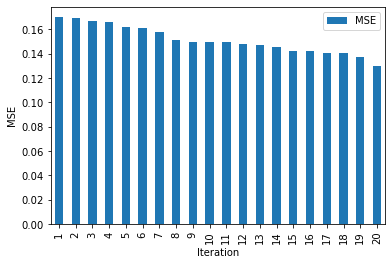

In [13]:
############### PLOT 1

type(desc)
df = desc.reset_index(drop=True)
df.index += 1
dfPlot = df.plot.bar()
dfPlot.set_xlabel("Iteration")
dfPlot.set_ylabel("MSE")

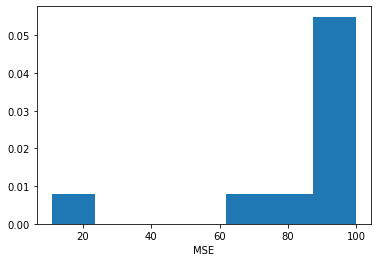

In [15]:
### Plot two 
df.iloc[-1]

fig = plt.figure()

x = desc.iloc[-1,3]
y = desc.iloc[-1,2]

plt.hist(x, density=True, bins=7)
plt.xlabel('MSE')
plt.show()

# plt.hist(desc_five.iloc[-1], density=True, bins=4)
# plt.show()

In [ ]:
# bestMSEList
dfBest.columns = ["mse","solution"]
dfBest.sort_values('mse', inplace=True)
dfBest.reset_index(drop=True, inplace= True)
dfBest

In [ ]:
bestSolution = dfBest.loc[0,'solution']
bestSolution = list(bestSolution)
bestSolution.sort()
bestSolution

In [ ]:
bestDescriptor = []

for i in bestSolution:
    bestDescriptor.append(descName[i])
bestDescriptor

In [ ]:
mseNdarray = np.asarray(bestMSEList)
type(mseNdarray)
mseNdarray.dump("./bestMSEList_2.pkl")
dfBest.iloc[-1][1].dump("./bestDesc_2.pkl")

In [ ]:
len(mseNdarray)
np.arange(0,len(mseNdarray),1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#define variable x
x = np.arange(0,len(mseNdarray),1)
y = mseNdarray 

#plot the functions
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")

plt.plot(x,y)

In [ ]:
MSE_Evol = pickle.load(open('./data/MSE_EvolutionV2.pkl', 'rb'))
bestDesc = pickle.load(open('./data/bestDescV2.pkl', 'rb'))
bestMSEGrowth = pickle.load(open('./data/bestMSEGrowthV2.pkl', 'rb'))

In [ ]:
bestDesc, MSE_Evol, bestMSEGrowth

In [ ]:
bestMSEGrowth

In [ ]:
# First Best Run
# BestDescriptors=  [31,18,54,36,8,51]
# BestMSE =  0.24519892533514573

# Second Best Run
# Best Descriptors :  [53 61 18 69 36 34]
# Best MSE :  0.22850883728849938

# Best Descriptors :  [40 11  5 67 64 69]
# Best MSE :  0.22858482530945248

# Best Descriptors :  [38 51 55 58 36 18]
# Best MSE :  0.20720460921006825

In [ ]:
# ### Smallest Values before run 20s
# bs = [38, 51, 55, 58, 36, 18]
# bs.sort()
# bs

In [ ]:
# bds = []
# for i in bs:
#     bds.append(descName[i])
# bds

In [ ]:
# pickle.dump(bds,open('./BestDescriptor.pkl','wb'))